In [ ]:
# %%

# # Market Regime Detection
# ## Step 1: Load Data
# Import libraries and load data from Google Drive.

In [ ]:
# %%

!pip install gdown pandas numpy scikit-learn matplotlib seaborn
import gdown
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# %%

# Download data
depth_folder_url = "https://drive.google.com/drive/folders/1Pf01z8wjQeEiEBeQd5bBiWj46Wg5yp7h?usp=sharing"
agg_trade_url = "https://drive.google.com/drive/folders/1kmZm4BcwbmJyspUz0kx7kIHMZB28uNHx"
gdown.download_folder(depth_folder_url, output="depth_data", quiet=False)
gdown.download_folder(agg_trade_url, output="agg_trade_data", quiet=False)

Retrieving folder contents


Processing file 1ny7mUHblVPrwJzHB3-PFq73Vy-o8RP5z BNBFDUSD_20250314.txt
Processing file 1cxoWJZDJwxKXjvvds2mQk9OpGzKJcWNC BNBFDUSD_20250315.txt
Processing file 1Up7grHN3J5ZvkSm_dQnXpG1JkYrotK4B BNBFDUSD_20250316.txt
Processing file 1o8mUO5o8u_s_WgPjpJMhGg0JETh8tqQ0 BNBFDUSD_20250317.txt


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1ny7mUHblVPrwJzHB3-PFq73Vy-o8RP5z
To: c:\Users\Aayush\AppData\Local\Programs\Microsoft VS Code\depth_data\BNBFDUSD_20250314.txt
100%|██████████| 85.5M/85.5M [00:22<00:00, 3.87MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cxoWJZDJwxKXjvvds2mQk9OpGzKJcWNC
To: c:\Users\Aayush\AppData\Local\Programs\Microsoft VS Code\depth_data\BNBFDUSD_20250315.txt
100%|██████████| 83.7M/83.7M [00:16<00:00, 4.98MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Up7grHN3J5ZvkSm_dQnXpG1JkYrotK4B
To: c:\Users\Aayush\AppData\Local\Programs\Microsoft VS Code\depth_data\BNBFDUSD_20250316.txt
100%|██████████| 84.3M/84.3M [00:18<00:00, 4.46MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o8mUO5o8u_s_WgPjpJMhGg0JETh8tqQ0
To: c:\Users\Aayush\AppData\Local\Programs\Microsoft VS Code\depth_data\BNBFDUSD_20250317.txt
100%|██████████|

Processing file 1ndhywF8Jr58u9gd3JoM_EZjw9BeAoj5u BNBFDUSD_20250314.txt
Processing file 166X9plIOpj2Oyu63-dImS_uC0IjEsd1l BNBFDUSD_20250315.txt
Processing file 136-y1nWoyp16Be6KmcCRzDpFnxz3bGXk BNBFDUSD_20250316.txt
Processing file 1e8WPZGe8MF7p1mL475ideVL_shiGtByp BNBFDUSD_20250317.txt


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1ndhywF8Jr58u9gd3JoM_EZjw9BeAoj5u
To: c:\Users\Aayush\AppData\Local\Programs\Microsoft VS Code\agg_trade_data\BNBFDUSD_20250314.txt
100%|██████████| 23.1M/23.1M [00:05<00:00, 3.95MB/s]
Downloading...
From: https://drive.google.com/uc?id=166X9plIOpj2Oyu63-dImS_uC0IjEsd1l
To: c:\Users\Aayush\AppData\Local\Programs\Microsoft VS Code\agg_trade_data\BNBFDUSD_20250315.txt
100%|██████████| 12.4M/12.4M [00:02<00:00, 4.31MB/s]
Downloading...
From: https://drive.google.com/uc?id=136-y1nWoyp16Be6KmcCRzDpFnxz3bGXk
To: c:\Users\Aayush\AppData\Local\Programs\Microsoft VS Code\agg_trade_data\BNBFDUSD_20250316.txt
100%|██████████| 12.7M/12.7M [00:02<00:00, 4.30MB/s]
Downloading...
From: https://drive.google.com/uc?id=1e8WPZGe8MF7p1mL475ideVL_shiGtByp
To: c:\Users\Aayush\AppData\Local\Programs\Microsoft VS Code\agg_trade_data\BNBFDUSD_20250317.txt


['agg_trade_data\\BNBFDUSD_20250314.txt',
 'agg_trade_data\\BNBFDUSD_20250315.txt',
 'agg_trade_data\\BNBFDUSD_20250316.txt',
 'agg_trade_data\\BNBFDUSD_20250317.txt']

In [ ]:
# %%

# Load and preprocess data
depth_files = glob(os.path.join("depth_data", "*.txt"))
depth_df = pd.concat([pd.read_csv(f) for f in depth_files])
depth_df['Time'] = depth_df['Time'].str.replace(r"\s+\+\d{4}\s+.*", "", regex=True)
depth_df['Time'] = pd.to_datetime(depth_df['Time'], format='%Y-%m-%d %H:%M:%S.%f')
depth_df.sort_values(by=['Time'], inplace=True)
depth_df.drop_duplicates(subset=['Time'], keep='first', inplace=True)
depth_df.set_index('Time', inplace=True)

agg_trade_files = glob(os.path.join("agg_trade_data", "*.txt"))
agg_trade_df = pd.concat([pd.read_csv(f) for f in agg_trade_files])
agg_trade_df['Time'] = agg_trade_df['Time'].str.replace(r"\s+\+\d{4}\s+.*", "", regex=True)
agg_trade_df['Time'] = pd.to_datetime(agg_trade_df['Time'], format='%Y-%m-%d %H:%M:%S.%f')
agg_trade_df.sort_values(by=['Time'], inplace=True)
agg_trade_df.drop_duplicates(subset=['Time'], keep='first', inplace=True)
agg_trade_df.set_index('Time', inplace=True)

In [ ]:
# %%

# [Trade Data Processing]
print("Columns in aggTrade data:", agg_trade_df.columns.tolist())

# Initialize volume columns
agg_trade_df['BuyVolume'] = 0
agg_trade_df['SellVolume'] = 0

# Calculate buy/sell volumes based on available columns
if 'isBuyerMaker' in agg_trade_df.columns:
    # Standard Binance format
    agg_trade_df['BuyVolume'] = np.where(~agg_trade_df['isBuyerMaker'], agg_trade_df['Quantity'], 0)
    agg_trade_df['SellVolume'] = np.where(agg_trade_df['isBuyerMaker'], agg_trade_df['Quantity'], 0)
elif 'aggressor_side' in agg_trade_df.columns:
    # Alternative exchange format
    agg_trade_df['BuyVolume'] = np.where(agg_trade_df['aggressor_side'] == 'buy', agg_trade_df['Quantity'], 0)
    agg_trade_df['SellVolume'] = np.where(agg_trade_df['aggressor_side'] == 'sell', agg_trade_df['Quantity'], 0)
elif 'IsMarketMaker' in agg_trade_df.columns:
    # Using the available column in your data
    # Assuming IsMarketMaker=True means the trade was seller-initiated (market maker selling)
    agg_trade_df['BuyVolume'] = np.where(~agg_trade_df['IsMarketMaker'], agg_trade_df['Quantity'], 0)
    agg_trade_df['SellVolume'] = np.where(agg_trade_df['IsMarketMaker'], agg_trade_df['Quantity'], 0)
else:
    available_cols = agg_trade_df.columns.tolist()
    raise KeyError(f"No valid column found to determine buy/sell volume. Available columns: {available_cols}")

# Calculate volume imbalance safely
total_volume = agg_trade_df['BuyVolume'] + agg_trade_df['SellVolume']
agg_trade_df['VolumeImbalance'] = (agg_trade_df['BuyVolume'] - agg_trade_df['SellVolume']) / (total_volume.replace(0, 1e-9))

# Verify calculations
print("\nVolume calculation sample:")
print(agg_trade_df[['Quantity', 'IsMarketMaker', 'BuyVolume', 'SellVolume', 'VolumeImbalance']].head())

Columns in aggTrade data: ['Price', 'Quantity', 'IsMarketMaker', 'NumTrades', 'M']

Volume calculation sample:
                               Quantity  IsMarketMaker  BuyVolume  SellVolume  \
Time                                                                            
2025-03-14 00:00:02.764823793     0.496           True        0.0       0.496   
2025-03-14 00:00:02.781509697     0.013           True        0.0       0.013   
2025-03-14 00:00:02.805731800     0.104           True        0.0       0.104   
2025-03-14 00:00:03.902576812     0.496           True        0.0       0.496   
2025-03-14 00:00:03.905083833     2.739           True        0.0       2.739   

                               VolumeImbalance  
Time                                            
2025-03-14 00:00:02.764823793             -1.0  
2025-03-14 00:00:02.781509697             -1.0  
2025-03-14 00:00:02.805731800             -1.0  
2025-03-14 00:00:03.902576812             -1.0  
2025-03-14 00:00:03.9050838

Columns in merged_df: ['BidPriceL20', 'BidQtyL20', 'BidPriceL19', 'BidQtyL19', 'BidPriceL18', 'BidQtyL18', 'BidPriceL17', 'BidQtyL17', 'BidPriceL16', 'BidQtyL16', 'BidPriceL15', 'BidQtyL15', 'BidPriceL14', 'BidQtyL14', 'BidPriceL13', 'BidQtyL13', 'BidPriceL12', 'BidQtyL12', 'BidPriceL11', 'BidQtyL11', 'BidPriceL10', 'BidQtyL10', 'BidPriceL9', 'BidQtyL9', 'BidPriceL8', 'BidQtyL8', 'BidPriceL7', 'BidQtyL7', 'BidPriceL6', 'BidQtyL6', 'BidPriceL5', 'BidQtyL5', 'BidPriceL4', 'BidQtyL4', 'BidPriceL3', 'BidQtyL3', 'BidPriceL2', 'BidQtyL2', 'BidPriceL1', 'BidQtyL1', 'AskPriceL1', 'AskQtyL1', 'AskPriceL2', 'AskQtyL2', 'AskPriceL3', 'AskQtyL3', 'AskPriceL4', 'AskQtyL4', 'AskPriceL5', 'AskQtyL5', 'AskPriceL6', 'AskQtyL6', 'AskPriceL7', 'AskQtyL7', 'AskPriceL8', 'AskQtyL8', 'AskPriceL9', 'AskQtyL9', 'AskPriceL10', 'AskQtyL10', 'AskPriceL11', 'AskQtyL11', 'AskPriceL12', 'AskQtyL12', 'AskPriceL13', 'AskQtyL13', 'AskPriceL14', 'AskQtyL14', 'AskPriceL15', 'AskQtyL15', 'AskPriceL16', 'AskQtyL16', 'AskP

<ipython-input-6-f1fbfb981ea5>:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featured_df['Cluster'] = kmeans.fit_predict(X_pca)


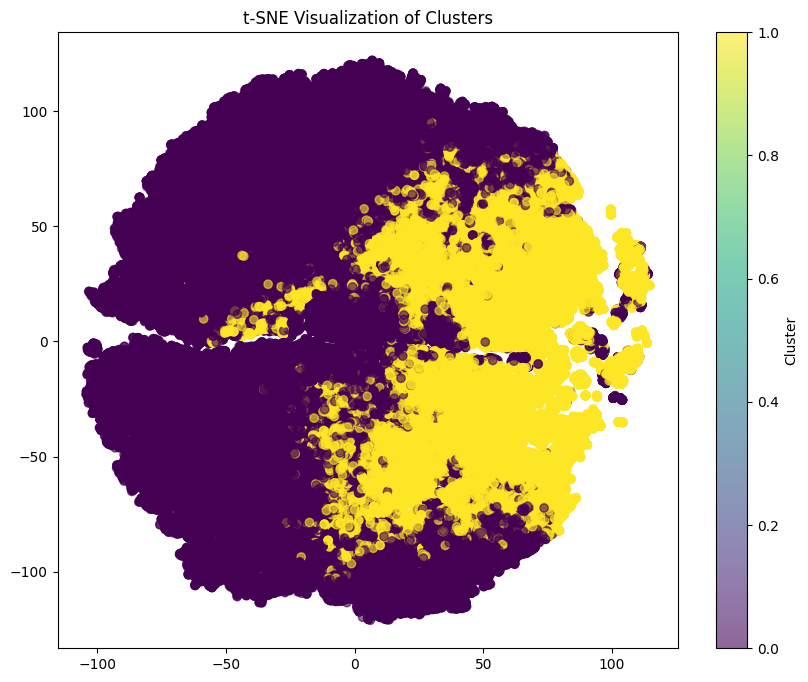

In [ ]:
# %%

# [Data Merging]
# Merge order book and trade data with proper time alignment
merged_df = pd.merge_asof(
    depth_df.sort_index(),
    agg_trade_df.sort_index(),
    left_index=True,
    right_index=True,
    direction='nearest',
    tolerance=pd.Timedelta('1s'),
    allow_exact_matches=False
)

# First, let's examine the actual columns in your merged data
print("Columns in merged_df:", merged_df.columns.tolist())

# Find the correct column names for bid/ask prices and quantities
# Common variations include:
# - 'bid1_price', 'ask1_price' (lowercase)
# - 'bid_price_1', 'ask_price_1'
# - 'best_bid', 'best_ask'

# Try to identify the correct columns
bid_price_col = None
ask_price_col = None
bid_qty_col = None
ask_qty_col = None

for col in merged_df.columns:
    if 'bid' in col.lower() and 'price' in col.lower():
        bid_price_col = col
    elif 'ask' in col.lower() and 'price' in col.lower():
        ask_price_col = col
    elif 'bid' in col.lower() and ('qty' in col.lower() or 'quantity' in col.lower()):
        bid_qty_col = col
    elif 'ask' in col.lower() and ('qty' in col.lower() or 'quantity' in col.lower()):
        ask_qty_col = col

# Verify we found the columns
if not all([bid_price_col, ask_price_col, bid_qty_col, ask_qty_col]):
    raise ValueError("Could not identify all required bid/ask columns. Found:\n"
                   f"Bid Price: {bid_price_col}\n"
                   f"Ask Price: {ask_price_col}\n"
                   f"Bid Qty: {bid_qty_col}\n"
                   f"Ask Qty: {ask_qty_col}")

# Now use the identified columns
required_cols = [bid_price_col, ask_price_col, bid_qty_col, ask_qty_col, 'Quantity', 'BuyVolume', 'SellVolume']
merged_df = merged_df.dropna(subset=required_cols)

# Update the feature engineering function to use the correct columns
def calculate_features(df):
    # Use the identified column names
    df['MidPrice'] = (df[ask_price_col] + df[bid_price_col]) / 2
    df['Spread'] = df[ask_price_col] - df[bid_price_col]
    df['MicroPrice'] = (df[bid_price_col] * df[ask_qty_col] + df[ask_price_col] * df[bid_qty_col]) / (df[bid_qty_col] + df[ask_qty_col] + 1e-9)

    # Order book imbalance
    df['OB_Imbalance_L1'] = (df[bid_qty_col] - df[ask_qty_col]) / (df[bid_qty_col] + df[ask_qty_col] + 1e-9)

    # For cumulative depth, we need to find all level columns
    # This will depend on your actual data structure
    # Example for finding all bid quantity columns:
    bid_qty_cols = [col for col in df.columns if 'bid' in col.lower() and ('qty' in col.lower() or 'quantity' in col.lower())]
    ask_qty_cols = [col for col in df.columns if 'ask' in col.lower() and ('qty' in col.lower() or 'quantity' in col.lower())]

    df['Cum_Bid_Qty'] = df[bid_qty_cols].sum(axis=1)
    df['Cum_Ask_Qty'] = df[ask_qty_cols].sum(axis=1)
    df['Total_Depth'] = df['Cum_Bid_Qty'] + df['Cum_Ask_Qty']

    return df
# Create featured dataframe
featured_df = calculate_features(merged_df)

# Add rolling features
window_sizes = [10, 30, 60]  # seconds
for window in window_sizes:
    # Price returns and volatility
    featured_df[f'Return_{window}s'] = np.log(featured_df['MidPrice'] / featured_df['MidPrice'].shift(1))
    featured_df[f'Volatility_{window}s'] = featured_df[f'Return_{window}s'].rolling(f'{window}s').std()

    # Volume metrics
    featured_df[f'Volume_{window}s'] = featured_df['Quantity'].rolling(f'{window}s').sum()
    featured_df[f'BuyVolume_{window}s'] = featured_df['BuyVolume'].rolling(f'{window}s').sum()
    featured_df[f'SellVolume_{window}s'] = featured_df['SellVolume'].rolling(f'{window}s').sum()

# Clean final features
featured_df = featured_df.dropna()

# [Feature Selection]
feature_cols = [
    'Spread', 'MicroPrice', 'OB_Imbalance_L1', 'Cum_Bid_Qty', 'Cum_Ask_Qty',
    'Total_Depth', 'VolumeImbalance', 'Return_30s', 'Volatility_30s',
    'Volume_30s', 'BuyVolume_30s', 'SellVolume_30s'
]

# Verify all selected features exist
available_cols = [col for col in feature_cols if col in featured_df.columns]
if len(available_cols) < len(feature_cols):
    missing = set(feature_cols) - set(available_cols)
    print(f"Warning: Missing features: {missing}")
    feature_cols = available_cols

X = featured_df[feature_cols]

# [Normalization]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# [Dimensionality Reduction]
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)
print(f"Reduced from {X_scaled.shape[1]} to {X_pca.shape[1]} dimensions")

# [Clustering]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters
k_range = range(2, 6)
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, labels))

optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Final clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
featured_df['Cluster'] = kmeans.fit_predict(X_pca)

# [Visualization]
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=featured_df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('t-SNE Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()


Regime Characteristics:
   Cluster                         Regime  Avg_Volatility  Avg_Spread  \
0        0    MeanReverting_Stable_Liquid        0.000085    0.297919   
1        1  MeanReverting_Volatile_Liquid        0.000142    0.352963   

    Avg_Depth  Pct_of_Time  
0  117.191742     0.697381  
1  156.386659     0.302619  


<ipython-input-7-dc31463041fa>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featured_df['Regime'] = featured_df['Cluster'].map(regime_descriptions)
<ipython-input-7-dc31463041fa>:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_regimes))


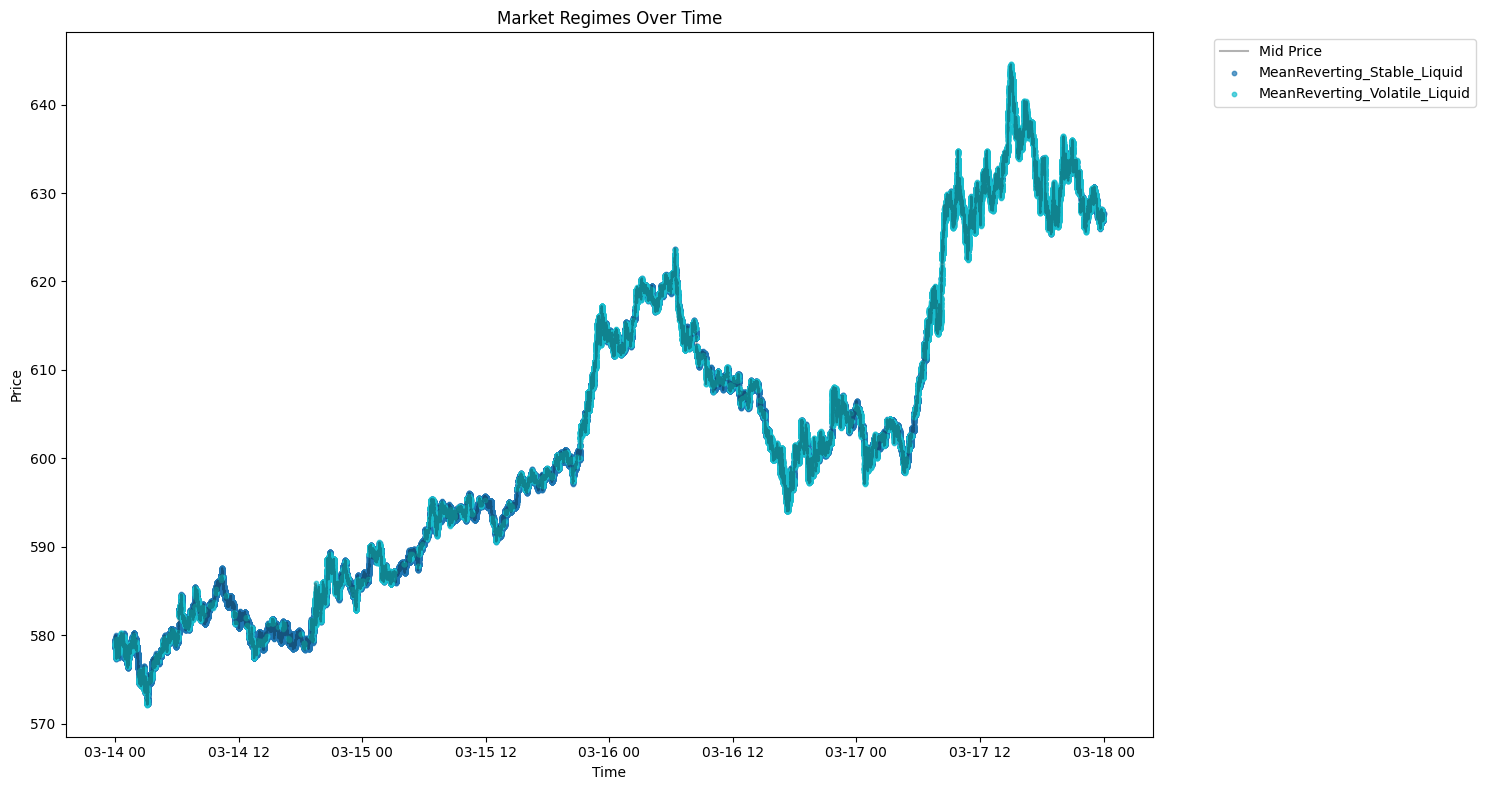

<ipython-input-7-dc31463041fa>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featured_df['RegimeChange'] = (featured_df['Regime'] != featured_df['Regime'].shift(1))


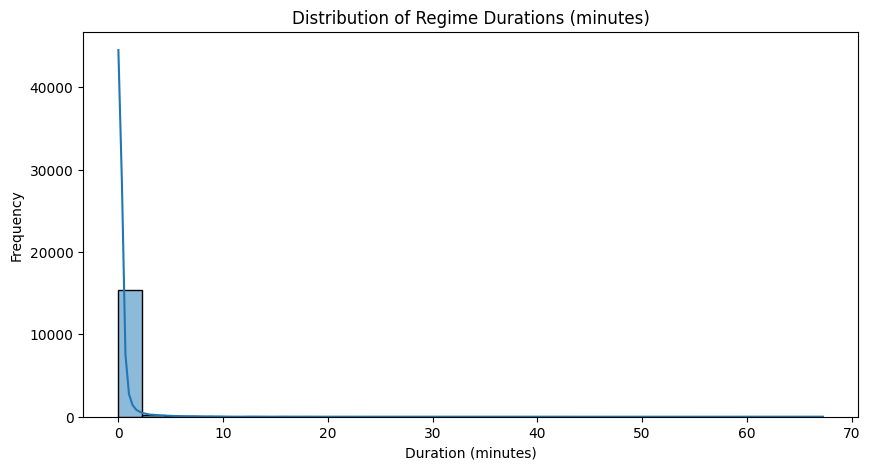

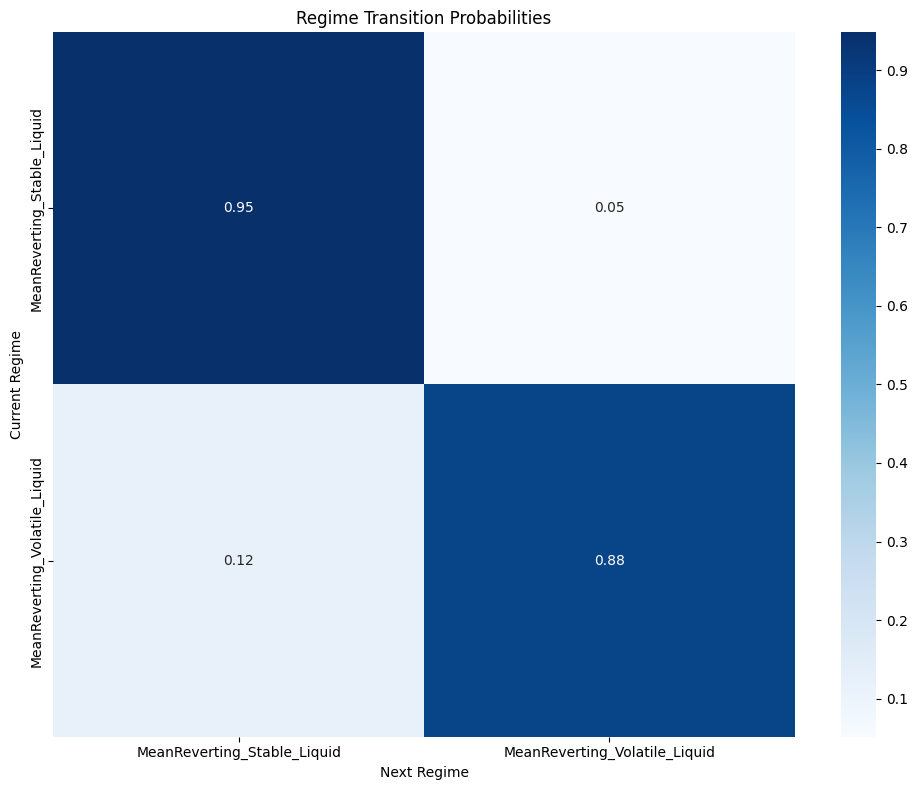

ValueError: Could not interpret value `VolumeImbalance_30s` for `y`. An entry with this name does not appear in `data`.

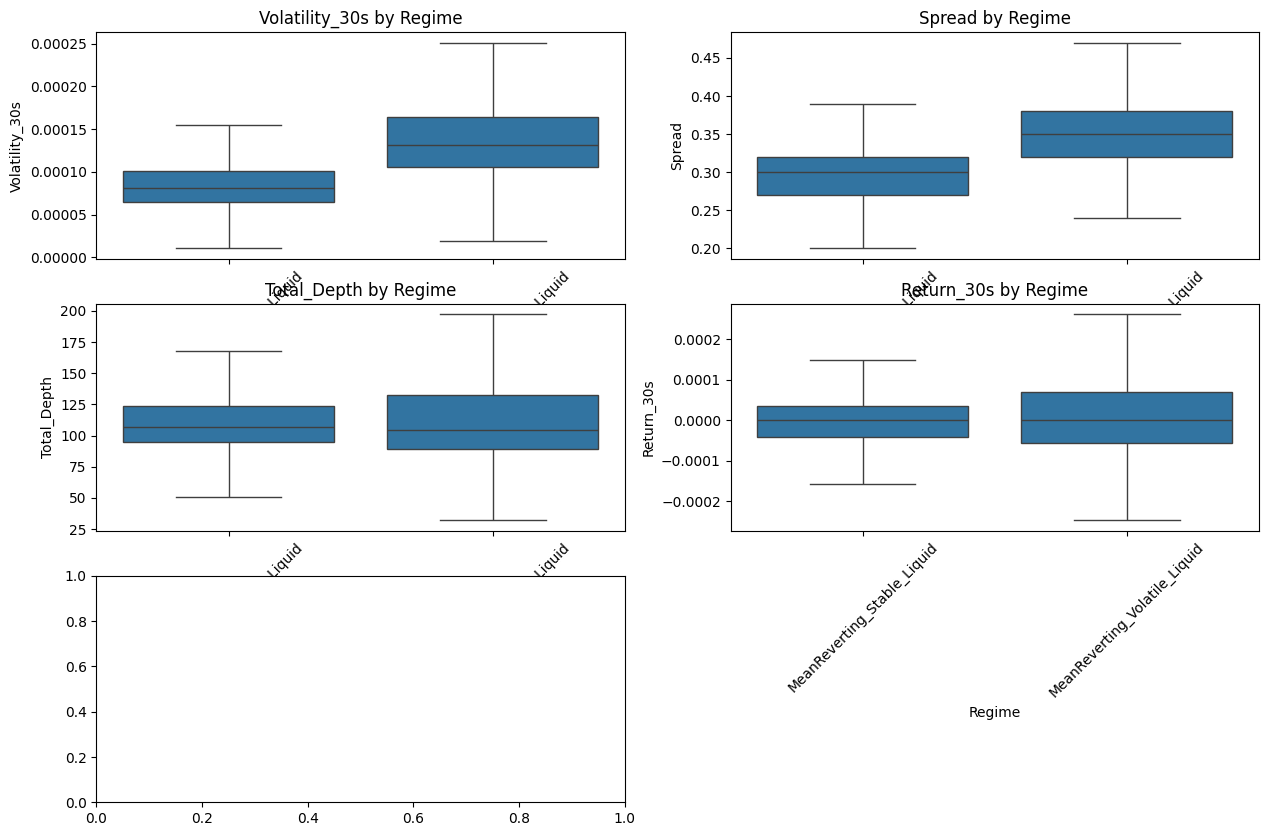

In [ ]:
# %%

# [Regime Characterization]
# Analyze cluster characteristics to define market regimes
regime_descriptions = {}
cluster_stats = []

for cluster in sorted(featured_df['Cluster'].unique()):
    cluster_data = featured_df[featured_df['Cluster'] == cluster]

    # Calculate percentiles for regime classification
    vol_pct = np.percentile(featured_df['Volatility_30s'], 75)
    ret_pct = np.percentile(abs(featured_df['Return_30s']), 75)
    depth_pct = np.percentile(featured_df['Total_Depth'], 50)

    # Determine regime characteristics
    trending = "Trending" if abs(cluster_data['Return_30s'].mean()) > ret_pct else "MeanReverting"
    volatile = "Volatile" if cluster_data['Volatility_30s'].mean() > vol_pct else "Stable"
    liquid = "Liquid" if cluster_data['Total_Depth'].mean() > depth_pct else "Illiquid"

    regime_name = f"{trending}_{volatile}_{liquid}"
    regime_descriptions[cluster] = regime_name

    # Store statistics
    stats = {
        'Cluster': cluster,
        'Regime': regime_name,
        'Avg_Volatility': cluster_data['Volatility_30s'].mean(),
        'Avg_Spread': cluster_data['Spread'].mean(),
        'Avg_Depth': cluster_data['Total_Depth'].mean(),
        'Avg_Return': cluster_data['Return_30s'].mean(),
        'Count': len(cluster_data),
        'Pct_of_Time': len(cluster_data)/len(featured_df)
    }
    cluster_stats.append(stats)

# Create regime dataframe
regime_df = pd.DataFrame(cluster_stats)
regime_df = regime_df.sort_values('Avg_Volatility')
print("\nRegime Characteristics:")
print(regime_df[['Cluster', 'Regime', 'Avg_Volatility', 'Avg_Spread', 'Avg_Depth', 'Pct_of_Time']])

# Add regime labels to main dataframe
featured_df['Regime'] = featured_df['Cluster'].map(regime_descriptions)

# [Regime Visualization Over Time]
plt.figure(figsize=(15, 8))

# Plot price
plt.plot(featured_df.index, featured_df['MidPrice'], 'k-', alpha=0.3, label='Mid Price')

# Create colormap for regimes
unique_regimes = featured_df['Regime'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_regimes))

for i, regime in enumerate(unique_regimes):
    regime_data = featured_df[featured_df['Regime'] == regime]
    plt.scatter(regime_data.index, regime_data['MidPrice'],
                color=colors(i), label=regime, s=10, alpha=0.7)

plt.title('Market Regimes Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# [Regime Duration Analysis]
# Calculate regime durations
featured_df['RegimeChange'] = (featured_df['Regime'] != featured_df['Regime'].shift(1))
regime_starts = featured_df[featured_df['RegimeChange']].index
regime_durations = [(regime_starts[i+1] - regime_starts[i]).total_seconds()/60
                   for i in range(len(regime_starts)-1)]

plt.figure(figsize=(10, 5))
sns.histplot(regime_durations, bins=30, kde=True)
plt.title('Distribution of Regime Durations (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# [Transition Matrix]
from sklearn.metrics import confusion_matrix

# Create regime sequence
regime_sequence = featured_df['Regime'].values
unique_regimes = sorted(featured_df['Regime'].unique())
n_regimes = len(unique_regimes)

# Create transition matrix
transition_matrix = np.zeros((n_regimes, n_regimes))
for i in range(1, len(regime_sequence)):
    current = unique_regimes.index(regime_sequence[i-1])
    next_ = unique_regimes.index(regime_sequence[i])
    transition_matrix[current, next_] += 1

# Normalize rows to get probabilities
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Plot transition matrix
plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=unique_regimes, yticklabels=unique_regimes)
plt.title('Regime Transition Probabilities')
plt.xlabel('Next Regime')
plt.ylabel('Current Regime')
plt.tight_layout()
plt.show()

# [Feature Distributions by Regime]
plt.figure(figsize=(15, 10))
features_to_plot = ['Volatility_30s', 'Spread', 'Total_Depth', 'Return_30s', 'VolumeImbalance_30s']

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Regime', y=feature, data=featured_df,
                order=regime_df['Regime'], showfliers=False)
    plt.xticks(rotation=45)
    plt.title(f'{feature} by Regime')

plt.tight_layout()
plt.show()

# [Save Results]
featured_df.to_csv('market_regime_results.csv', index=True)
regime_df.to_csv('regime_statistics.csv', index=False)